In [50]:
#import relevant packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


For reference, the data source is https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified

In [51]:
#loading in data
data = pd.read_csv('drug_consumption.csv', header = None)

In [52]:
# adding column names, original .csv file did not have a header 
data.columns = ['id', 'age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 
                'ss', 'alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstacy', 'heroin', 'ketamine',
                'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']

In [53]:
#creating new dataframe to only contain the nicotine column as target 
data_nic = data.drop(columns=['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstacy', 'heroin', 
                              'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'semer', 'vsa'])

In [54]:
data_nic.head(1)

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss,nicotine
0,1,0.49788,0.48246,-0.05921,0.96082,0.126,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL2


In [55]:
#splitting dataset into training and test set 

from sklearn.model_selection import train_test_split
nictrain_set, nictest_set = train_test_split(data_nic, test_size = 0.2, random_state = 66)

In [56]:
#looking at proportion of each category from training and test set, to make sure that the split didn't lead to imbalances 

targetprop_train = nictrain_set['nicotine'].value_counts(normalize=True)
targetprop_test = nictest_set['nicotine'].value_counts(normalize=True)

print(targetprop_train, targetprop_test)

#can see that the proportion of each category is relatively similar, so we can proceed with the train/test split above 

nicotine
CL6    0.317639
CL0    0.230769
CL2    0.110743
CL1    0.102122
CL3    0.098143
CL5    0.085544
CL4    0.055040
Name: proportion, dtype: float64 nicotine
CL6    0.347480
CL0    0.212202
CL1    0.103448
CL2    0.098143
CL3    0.098143
CL5    0.074271
CL4    0.066313
Name: proportion, dtype: float64


We can see that the target variable has 7 different categories. The question we would like to investigate is whether or not an individual is at risk of being a frequent consumer of a particular drug. To answer this question, we can further discretise the target variable into 3 categories. 

* freq_user - Frequent user of particular drug. This category will encompass CL5 and CL6 
* infreq_user - Infrequent user of a particular drug. This category will encompass CL3 and CL4 
* Non-user - Not a user of particular drug. This category will encompass CL0, CL1, CL2

In [57]:
nictrain_set['nicotine'] = nictrain_set['nicotine'].replace(['CL5', 'CL6'], 'freq_user')
nictrain_set['nicotine'] = nictrain_set['nicotine'].replace(['CL3', 'CL4'], 'infreq_user')
nictrain_set['nicotine'] = nictrain_set['nicotine'].replace(['CL0', 'CL1', 'CL2'], 'non_user')

In [64]:
#function for generating a subset of the original training set 
def subset (feature, value):
    newdat = nictrain_set[nictrain_set[feature] == value]
    newdat_count = newdat['nicotine'].value_counts()
    return(newdat_count)

# Data Exploration

We want to first have a look at the frequency of each category for each feature. This is done to identify categories that have very few observations. We also want to have a look at the frequency of nicotine consumption for each category, for each feature. If we are able to identifies categories that have similar nicotine consumption patterns, then we can consider combining these categories. 

## Exploring Age

In [59]:
frequency_age = nictrain_set['age'].value_counts()
print(frequency_age)

age
-0.95197    517
-0.07854    378
 0.49788    296
 1.09449    229
 1.82213     73
 2.59171     15
Name: count, dtype: int64


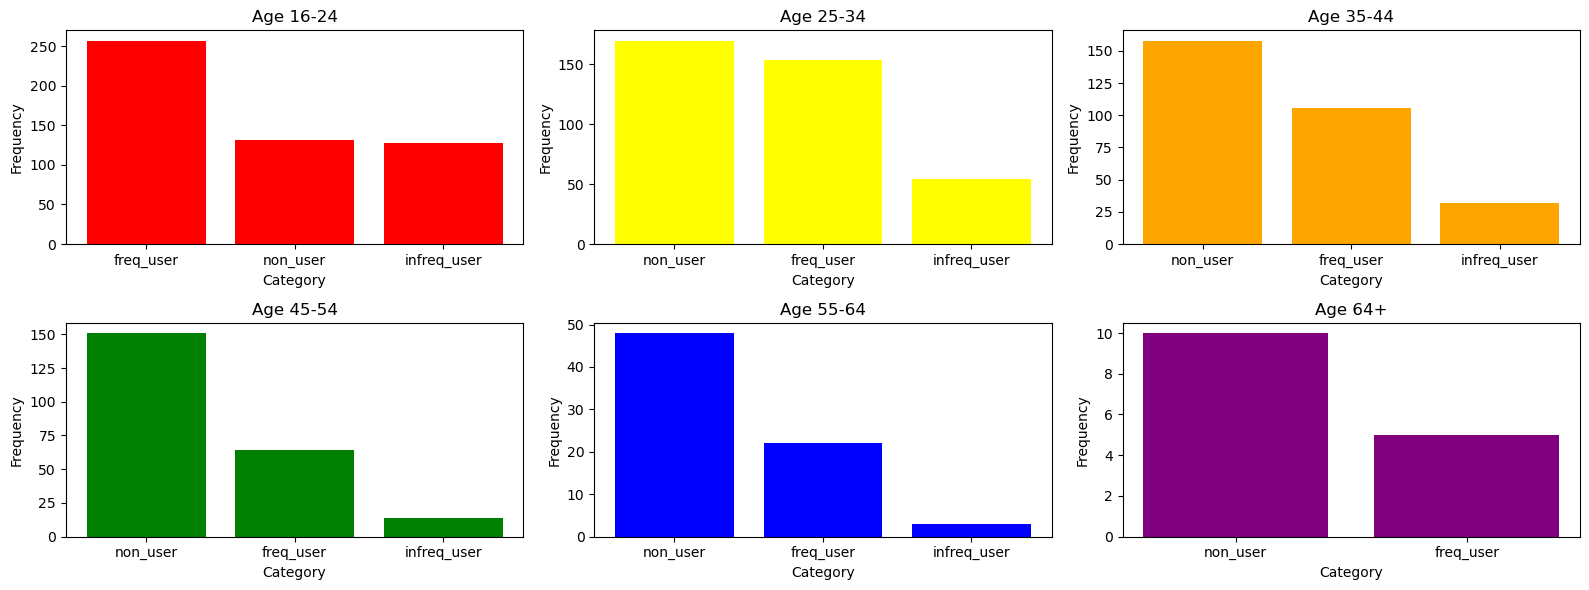

In [96]:
#plotting the frequency of nicotine consumption, comparing the different age categories 

nicotine_counts_1624 = subset('age', -0.95197)
nicotine_counts_2534 = subset('age', -0.07854)
nicotine_counts_3544 = subset('age', 0.49788)
nicotine_counts_4554 = subset('age', 1.09449)
nicotine_counts_5564 = subset('age', 1.82213)
nicotine_counts_64plus = subset('age', 2.59171)

plt.figure(figsize=(16, 6))

plt.subplot(2, 3, 1) #row, column, subplot
plt.bar(nicotine_counts_1624.index, nicotine_counts_1624.values, color='red')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 16-24')

plt.subplot(2, 3, 2)  
plt.bar(nicotine_counts_2534.index, nicotine_counts_2534.values, color='yellow')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 25-34')

plt.subplot(2, 3, 3)  
plt.bar(nicotine_counts_3544.index, nicotine_counts_3544.values, color='orange')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 35-44')

plt.subplot(2, 3, 4)
plt.bar(nicotine_counts_4554.index, nicotine_counts_4554.values, color='green')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 45-54')

plt.subplot(2, 3, 5)
plt.bar(nicotine_counts_5564.index, nicotine_counts_5564.values, color='blue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 55-64')

plt.subplot(2, 3, 6)
plt.bar(nicotine_counts_64plus.index, nicotine_counts_64plus.values, color='purple')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Age 64+')

plt.tight_layout()
plt.show()

## Exploring Gender

In [60]:
frequency_gender = nictrain_set['gender'].value_counts()
print(frequency_gender)

gender
 0.48246    766
-0.48246    742
Name: count, dtype: int64


In [61]:
frequency_education = nictrain_set['education'].value_counts()
print(frequency_education)

education
-0.61113    410
 0.45468    397
 1.16365    220
-0.05921    214
-1.73790     82
-1.22751     77
 1.98437     67
-2.43591     22
-1.43719     19
Name: count, dtype: int64


In [62]:
frequency_country = nictrain_set['country'].value_counts()
print(frequency_country)

#can see that there are only 3 observations for -0.46841 (New Zealand), so could consider removing these observations 

country
 0.96082    838
-0.57009    446
-0.28519     93
 0.24923     66
-0.09765     46
 0.21128     16
-0.46841      3
Name: count, dtype: int64


In [63]:
frequency_ethnicity = nictrain_set['ethnicity'].value_counts()
print(frequency_ethnicity)

#majority of the ethnicities in training set is -0.31685 (white). there are small numbers of other ethnicities, so could consider combining them. 

ethnicity
-0.31685    1378
 0.11440      53
-0.50212      24
-1.10702      23
-0.22166      16
 0.12600      13
 1.90725       1
Name: count, dtype: int64


To investigate whether or not we should combine all ethnicities that aren't white into one category, we should compare the frequency of nicotine consumption for the minorities in this dataset. 

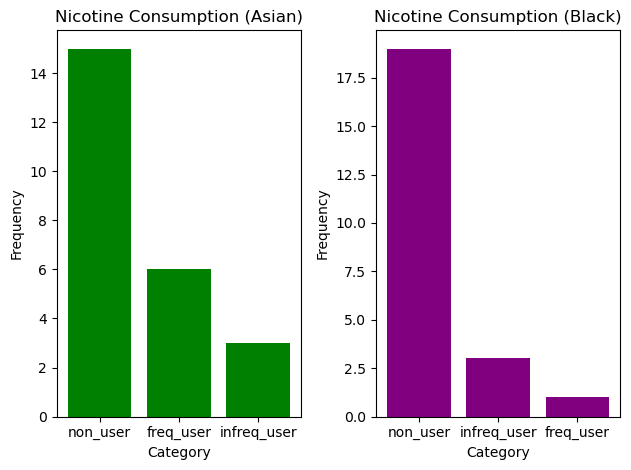

In [65]:
#plotting the frequency of nicotine consumption, comparing asians and blacks 

nicotine_counts_asian = subset('ethnicity', -0.50212)
nicotine_counts_black = subset('ethnicity', -1.10702)

plt.subplot(1, 2, 1)
plt.bar(nicotine_counts_asian.index, nicotine_counts_asian.values, color='green')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Asian)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(nicotine_counts_black.index, nicotine_counts_black.values, color='purple')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Black)')

plt.tight_layout()
plt.show()

It looks as if for both Asians and Blacks, majority of individuals have never used nicotine. Let's now compare the above histograms with the frequency of nicotine consumption when combining both ethnicities together. 

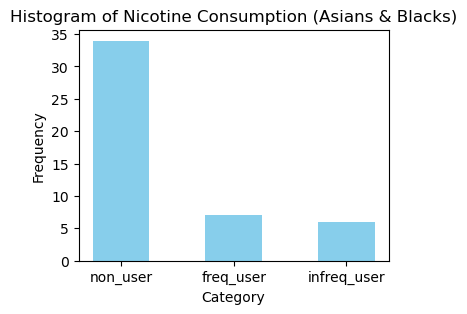

In [74]:
nictrain_set_asianblack = nictrain_set[nictrain_set['ethnicity'].isin([-0.50212, -1.10702])]
nicotine_counts_asianblack = nictrain_set_asianblack['nicotine'].value_counts()

plt.figure(figsize=(4, 3))
plt.bar(nicotine_counts_asianblack.index, nicotine_counts_asianblack.values, color='skyblue', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Nicotine Consumption (Asians & Blacks)')
plt.show()

We can see that for Asians, the second most likely category is freq_user. The second most likely category for Blacks is infreq_user. However, this distinction becomes blurred when we combine Asians and Blacks together. This suggests that it would not be the best idea to combine these categories together. However, the lack of observations present in each category also presents a problem. 

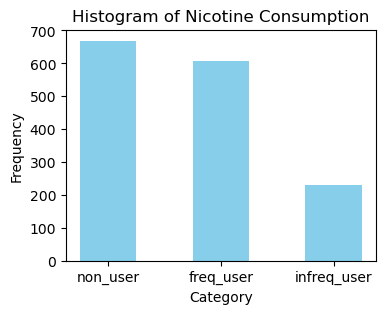

In [75]:
#Visualise proportion of each category in the target variable 
nicotine_counts = nictrain_set['nicotine'].value_counts()

plt.figure(figsize=(4, 3))
plt.bar(nicotine_counts.index, nicotine_counts.values, color='skyblue', width = 0.5)
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Nicotine Consumption')
plt.show()

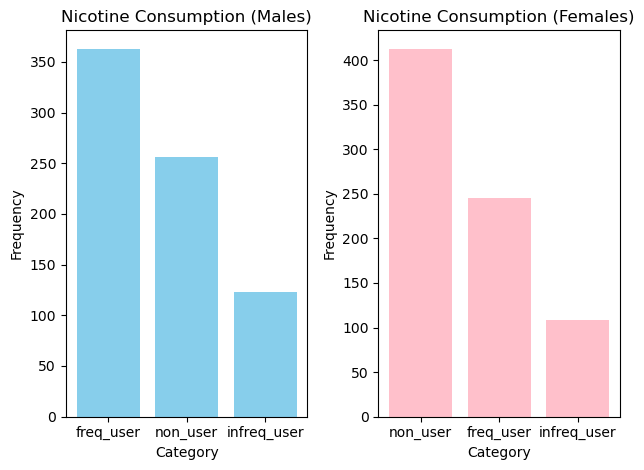

In [68]:
#plotting the frequency of nicotine consumption for males and females separately 

nictrain_set_male = nictrain_set[nictrain_set['gender'] == -0.48246]
nictrain_set_female = nictrain_set[nictrain_set['gender'] == 0.48246]

nicotine_counts_male = nictrain_set_male['nicotine'].value_counts()
nicotine_counts_female = nictrain_set_female['nicotine'].value_counts()


plt.subplot(1, 2, 1)
plt.bar(nicotine_counts_male.index, nicotine_counts_male.values, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Males)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(nicotine_counts_female.index, nicotine_counts_female.values, color='pink')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Nicotine Consumption (Females)')

plt.tight_layout()
plt.show()

The above plot shows that it is more common for Females to have never consumed nicotine (greatest proportion of CL0), whilst it is most common for Males to have consumed nicotine in the last day (Cl6). However for both sexes, there is the greatest proportion of CL0 and Cl6. The remaining categories all have substantially fewer observations. Perhaps we can combine Cl1 to Cl5 into one category

In [69]:
#plotting the frequency of nicotine consumption for 